### 모델 성능 검증하기
세즈노프스키(Sejnowski) 교수의 데이터를 가지고 광석을 구분해보자!

In [20]:
import pandas as pd
df = pd.read_csv('../data/sonar3.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [21]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [22]:
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델설정
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
history = model.fit(X, y, epochs = 200, batch_size = 10)

Epoch 1/200
21/21 [==============================] - 1s 2ms/step - loss: 0.6821 - accuracy: 0.6010
Epoch 2/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6538
Epoch 3/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.6779
Epoch 4/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6731
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7019
Epoch 6/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7163
Epoch 7/200
21/21 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.7308
Epoch 8/200
21/21 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7404
Epoch 9/200
21/21 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7644
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.5486 - accuracy: 0.7452
Epoch 11/

==> 정확도 100의 모델?

### 과적합(Overfitting)
: 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만, 새로운 데이터에 적용하면 잘 맞지 않는다.

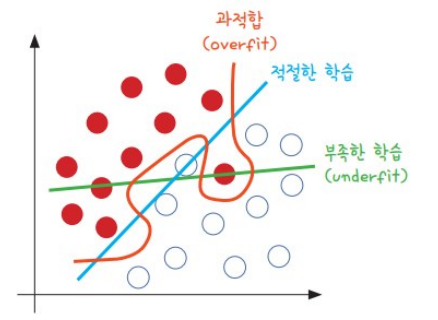

- 층이 너무 많거나 변수가 복잡해서 발생하기도 하고 테스트셋과 학습셋이 중복될 때 생기기도 함.
- 특히 딥러닝은 학습 단계에서 입력층, 은닉층, 출력층의 노드들에 상당히 많은 변수가 투입
- *딥러닝을 진행하는 동안 과적합에 빠지지 않게 늘 주의해야 함

#### 학습셋과 테스트셋
: 과적합을 방지하기 위해 테스트셋과 학습셋을 완전히 구분한 수 학습과 동시에 테스트를 병행하여 진행
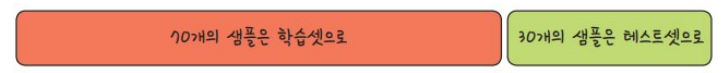
- 70개의 샘플로 학습을 진행 후 이 학습의 결과를 저장 ==> 저장된 파일을 **모델**이라고 함
- 나머지 30개의 샘플로 실험해서 정확도를 살펴보면 학습이 얼마나 잘되었는지 알 수 있다.

- 머신 러닝의 최종 목적은 과거의 데이터를 토대로 새로운 데이터를 예측하는 것
- ==> 새로운 데이터에 사용할 모델을 만드는 것이 최종 목적이므로 테스트셋을 만들어 정확한 평가를 병행하는 것이 중요.
- 학습셋만 가지고 평가할 때, 층을 더하거나 에포크(epoch)값이 커질 수록 정확도가 계속 올라갈 수 있다. ==> 과적합

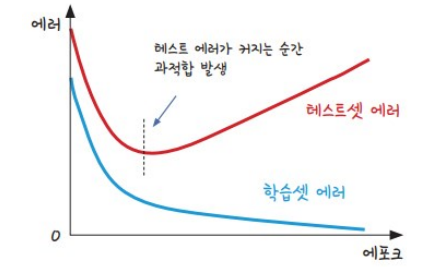

- 세즈노프스키 교수의 실험에서 은닉층 갯수(# of hidden units)가 올라감에 따라 학습셋의 예측률 (avg. performance on training sets)과 테스트 셋의 예측률 (avg. performance on testing set)이 어떻게 변하는지 볼 수 있다. 

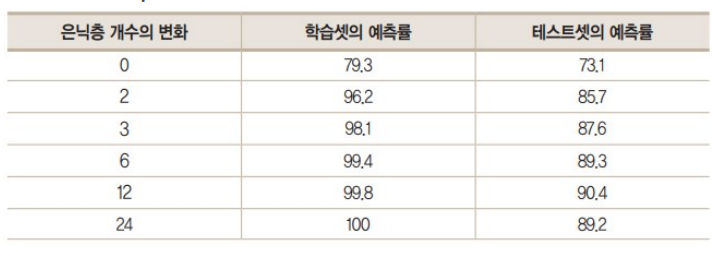


* sklearn을 이용하여 테스트셋과 학습셋을 분리하자

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [8]:
# 모델설정
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs = 200, batch_size = 10)

Epoch 1/200
15/15 [==============================] - 1s 2ms/step - loss: 0.6861 - accuracy: 0.5793
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.6690
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7034
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6759
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7103
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.7034
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.7172
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7310
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7379
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5459 - accuracy: 0.7517
Epoch 11/

In [9]:
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.9941 - accuracy: 0.7778
Test accuracy :  0.7777777910232544


In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
confusion_matrix(y_true=y_test, y_pred=y_pred)

2/2 [==============================] - 0s 3ms/step


array([[16,  7],
       [ 7, 33]], dtype=int64)

### 모델 저장과 재사용

In [14]:
# 모델 저장
model.save('../data/model/sonar_model.hdf5')

c:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# 테스트를 위해 조금 전 사용한 모델을 메모리에서 삭제
del model

In [17]:
# 모델을 새로 불러옴
from tensorflow.keras.models import load_model
model = load_model('../data/model/sonar_model.hdf5')

# 불러온 모델을 테스트셋에 적용해 정확도를 구한다
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.9941 - accuracy: 0.7778
Test accuracy :  0.7777777910232544


### K겹 교차 검증(k-fold cross validation)
: 데이터의 100%를 학습셋으로 사용할 수 있고 동시에 테스트셋으로도 사용할 수 있음.
예) 5겹 교차 검증

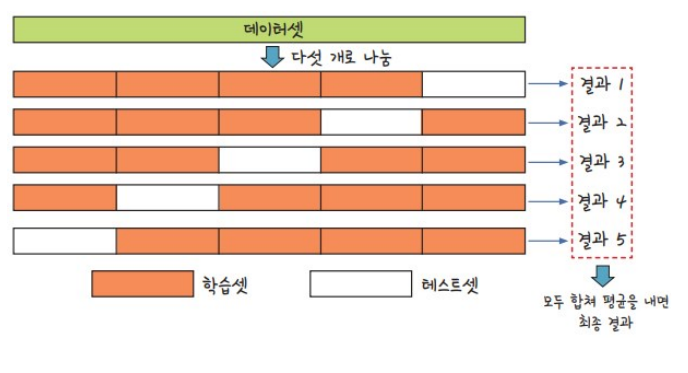


In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
k = 5
kfold = KFold(n_splits = k, shuffle = True)
acc_score = []

def model_fn():
    model = Sequential()
    model.add(Dense(24, input_dim = 60, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    return model

# k겹 교차 검증을 이용해 k번의 학습을 실행
# for문에 의해 k번 반복
# split() 에 의해 k개의 학습셋, 테스트셋으로 분리
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = model_fn()
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    history = model.fit(X_train, y_train, epochs = 200, batch_size = 10, verbose = 0)  # verbose = 1 또는 0 : 실행결과 출력/미출력
    
    accuracy = model.evaluate(X_test, y_test)[1]      # 정확도를 구한다
    acc_score.append(accuracy)                          # acc_score 리스트에 저장한다

avg_acc_score = sum(acc_score)/k    # k번 실시된 정확도의 평균
print('정확도 : ', acc_score); print('정확도 평균 : ', avg_acc_score)

2/2 [==============================] - 0s 5ms/step - loss: 0.3845 - accuracy: 0.8537
정확도 :  [0.8809523582458496, 0.761904776096344, 0.8095238208770752, 0.8536585569381714, 0.8536585569381714]
정확도 평균 :  0.8319396138191223
